### Q1

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#def ER(par , data ):
#ER = 0
# compute the error rate
#see formula (5) in this pdf file
#return ER

#This function is priorly provided in the assignment in order to generate data
def generateData (d, N, noise):
    
    X = [np.random.randn(d) for n in range(N)]
    lambdaTrue = np.cos(np.random.randn(d+1))
    Y = [((lambdaTrue[0] + lambdaTrue[1:] @ s) + noise * np.random.randn() > 0) for s in X]
    D = [[X[n], Y[n]] for n in range (N)]
    return D

#This function is priorly provided in the assignment in order to train the method
def train(par0, eta, T, data):
    #parameters are epochs,par0, learning rate
    par = np.array(list(par0))
    obj = []
    for t in range(T):
        #Calculates the l and delta l value 
        l = objective(par, data)
        Dl = gradient(par, data)        
        obj.append(l)
        par[1:] = par[1:] - (eta * Dl)
    return par, obj

#This function is priorly provided in the assignment in order to objective the method
def objective(par, data):
    #parameters are basically par and data
    
    ell = 0
    for (x, y) in data:
        f = model(x, par)   
        ell = abs(ell - np.log((y * f) + (1 - y) * (1 - f)))
    return ell

def gradient(par, data):
    Dl = np.zeros(len(par[1:]))
    for (x, y) in data:
        f = model(x, par)
        Df = dModel(x, par)
        #g = -1 * (((2*y-1)/(y*f)+((1 - y) * (1 - f))) * Df)
        g = -1 * ((2*y - 1)/((y * f) + (1 - y) * (1 - f))) * Df
        #filtered_data = [v for v in g if not math.isnan(v) and not math.isinf(v)]
        #if len(filtered_data) > 0:
        #    Dl = Dl + filtered_data   
        Dl = Dl + g
    return Dl

def model(x, par):
    #for i in range(1,len(par)):     
    f = np.sum(par[1:] * x)
    #The fundamental block for all the functions to work
    f = par[0] + f
    f = 1/(1 + np.exp(-f))
    return f

def dModel(x, par):
    df = np.zeros(len(par))
    #for i in range(1,len(par)):     
    df = np.sum(par[1:] * x)
    #differenciation of model function that passes x,par as parameters  
    df = par[0] + df
    df = (1/(1 + np.exp(-df))) * (1 - (1/(1 + np.exp(-df))))
    df = df * x.T
    return df


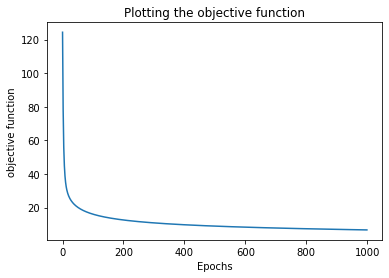

In [39]:
d = 10 #  The dimension of each data point
N = 100 #  The no   of data pointsthat has to be  generated
noise = 0.01
data = generateData(d, N, noise)

eta = 0.01     #This sets the learning rate
T = 1000       #This sets the no. of epochs
par0 = np.random.randn(d+1) #generating  a random initialisation of the data
par, obj = train(par0, eta, T, data) #This trains the model

plt.plot(obj) # This plots the objective
plt.title("Plotting the objective function")
plt.xlabel("Epochs")
plt.ylabel("objective function")
plt.show()

### Q2

In [40]:
#We have imported certain inbuilt functions
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [41]:
#importing the data set
file = pd.read_table("auto.txt")
file.head(400)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [42]:
#https://pythonguides.com/add-a-column-to-a-dataframe-in-python-pandas/----reference taken to do the same implementation
df = pd.DataFrame(file)
df.head()
#You have to add the new column "high" for a certain condition w.r.t mpg
df['high'] = df['mpg'].apply(lambda x: '1' if x>=23 else '0')
fc = df.pop('high')
df.insert(0,'high',fc)
display(df)


,high,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,0,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,0,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,0,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
392,1,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,1,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,1,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,1,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [43]:
#https://www.youtube.com/watch?v=wSgWf-lUdDU&t=4s---reference from a youtube chanel,credits given
df_t = df.copy()
#first part of normalisation
#(givenvalue-minimum_value)/(max_value_given_value-min_value_given_value)
df_t['weight']=(df_t['weight']-df_t['weight'].min())/(df_t['weight'].max()-df_t['weight'].min())
df_t['acceleration']=(df_t['acceleration']-df_t['acceleration'].min())/(df_t['acceleration'].max()-df_t['acceleration'].min())
df_t['year']=(df_t['year']-df_t['year'].min())/(df_t['year'].max()-df_t['year'].min())
print(df_t)

    high   mpg  cylinders  displacement horsepower    weight  acceleration  \
0      0  18.0          8         307.0        130  0.536150      0.238095   
1      0  15.0          8         350.0        165  0.589736      0.208333   
2      0  18.0          8         318.0        150  0.516870      0.178571   
3      0  16.0          8         304.0        150  0.516019      0.238095   
4      0  17.0          8         302.0        140  0.520556      0.148810   
..   ...   ...        ...           ...        ...       ...           ...   
392    1  27.0          4         140.0         86  0.333711      0.452381   
393    1  44.0          4          97.0         52  0.146583      0.988095   
394    1  32.0          4         135.0         84  0.193365      0.214286   
395    1  28.0          4         120.0         79  0.286929      0.630952   
396    1  31.0          4         119.0         82  0.313864      0.678571   

     year  origin                       name  
0     0.0       

In [44]:
df_t['high']= pd.to_numeric(df_t['high'])
df_t.info()
D = [[ np. array ([x[5] , x[6] , x [7]]) , 1 * (x[0]>=23)]for x in df_t.values]
#print(D)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   high          397 non-null    int64  
 1   mpg           397 non-null    float64
 2   cylinders     397 non-null    int64  
 3   displacement  397 non-null    float64
 4   horsepower    397 non-null    object 
 5   weight        397 non-null    float64
 6   acceleration  397 non-null    float64
 7   year          397 non-null    float64
 8   origin        397 non-null    int64  
 9   name          397 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 31.1+ KB


In [45]:
print(df_t)
df_t= pd.DataFrame(D)
print("")

     high   mpg  cylinders  displacement horsepower    weight  acceleration  \
0       0  18.0          8         307.0        130  0.536150      0.238095   
1       0  15.0          8         350.0        165  0.589736      0.208333   
2       0  18.0          8         318.0        150  0.516870      0.178571   
3       0  16.0          8         304.0        150  0.516019      0.238095   
4       0  17.0          8         302.0        140  0.520556      0.148810   
..    ...   ...        ...           ...        ...       ...           ...   
392     1  27.0          4         140.0         86  0.333711      0.452381   
393     1  44.0          4          97.0         52  0.146583      0.988095   
394     1  32.0          4         135.0         84  0.193365      0.214286   
395     1  28.0          4         120.0         79  0.286929      0.630952   
396     1  31.0          4         119.0         82  0.313864      0.678571   

     year  origin                       name  
0   

In [46]:
def train(par0, eta, T, data):
    #Using the train function to train the model
    #parameters passed par0, eta ,T ,data
    par = np.array(list(par0))
    obj = []
    for t in range(T):
        l = objective(par, data)
        Dl = gradient(par, data)        
        obj.append(l)
        par[1:] = par[1:] - (eta * Dl)
    return par, obj

def objective(par, data):
    #Objective function is to provide the objective to the training model
    ell = 0
    for (x, y) in data:
        f = model(x, par)   
        ell = abs(ell - np.log((y * f) + (1 - y) * (1 - f)))
    return ell

def gradient(par, data):
    #Gradient function is used to calculate the gradient  descent for the algorithm
    Dl = np.zeros(len(par[1:]))
    for (x, y) in data:
        f = model(x, par)
        Df = dModel(x, par)
        #g = -1 * (((2*y-1)/(y*f)+((1 - y) * (1 - f))) * Df)
        g = -1 * ((2*y - 1)/((y * f) + (1 - y) * (1 - f))) * Df
        #filtered_data = [v for v in g if not math.isnan(v) and not math.isinf(v)]
        #if len(filtered_data) > 0:
        #    Dl = Dl + filtered_data   
        Dl = Dl + g
    return Dl

def model(x, par):
    #for i in range(1,len(par)):     
    f = np.sum(par[1:] * x)
    #Fundamental block for all the functions to work
    f = par[0] + f
    f = 1/(1 + np.exp(-f))
    return f

def dModel(x, par):
    df = np.zeros(len(par))
    #for i in range(1,len(par)):     
    df = np.sum(par[1:] * x)
     #Its the differenciation of model(x,par)
    df = par[0] + df
    df = (1/(1 + np.exp(-df))) * (1 - (1/(1 + np.exp(-df))))
    df = df * x.T
    return df


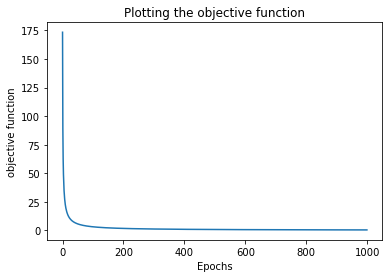

In [47]:
d = 3 # This is the    dimension of each data    point
N = 100 # The number of data     points to be    generated are.
noise = 0.01
eta = 0.01     #This is to set    the learning rate
T = 1000       #This is to set    the number of epochs
mean = 0
sd = 0.7
par0 = np.random.normal(mean,sd,d+1) # generating  a random initialisation for mean,std deviation and d+1 
par, obj = train(par0, eta, T, D) #train the model

plt.plot(obj) # This is to    plot the objective   graph
plt.title("Plotting the objective function")
plt.xlabel("Epochs")
plt.ylabel("objective function")
plt.show()

In [48]:
epochs = [100,200,300]
etas = [0.1,0.01,0.001]
newpar = []
newobj = []
for epoch in epochs:
    for eta in etas:
        #d = 3 #          dimension of each data point
        #N = 100 # number         of data points     to be generated
        #noise = 0.01
        #eta = 0.01     #setting      the learning   rate
        #T = 1000       #setting       the number     of epochs
        mean = 0
        sd = 0.7
        par0 = np.random.normal(mean,sd,d+1) #generating     a random initialisation
        par, obj = train(par0, eta, T, D) #trainning    the model
        newpar.append(par)
        newobj.append(obj)

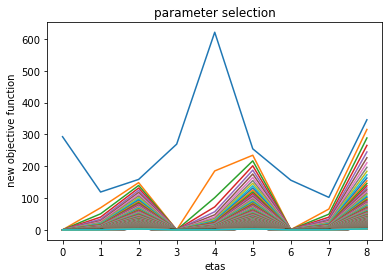

In [49]:
plt.title("parameter selection")
plt.xlabel("etas")
plt.ylabel(" new objective function")
plt.plot(newobj) # plot the objective
plt.show()

### Q3

In [50]:
file

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,high
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


In [51]:
nf3 = file[['weight','acceleration','year','origin','high']]

In [52]:
nf3

,weight,acceleration,year,origin,high
0,3504,12.0,70,1,0
1,3693,11.5,70,1,0
2,3436,11.0,70,1,0
3,3433,12.0,70,1,0
4,3449,10.5,70,1,0
...,...,...,...,...,...
392,2790,15.6,82,1,1
393,2130,24.6,82,2,1
394,2295,11.6,82,1,1
395,2625,18.6,82,1,1


In [53]:
nf3 = pd.get_dummies( nf3, columns = ['origin'])

In [54]:
#df_t = df.copy()
#first part of normalisation
#(givenvalue-minimum_value)/(max_value_given_value-min_value_given_value)
nf3['weight']=(nf3['weight']-nf3['weight'].min())/(nf3['weight'].max()-nf3['weight'].min())
nf3['acceleration']=(nf3['acceleration']-nf3['acceleration'].min())/(nf3['acceleration'].max()-nf3['acceleration'].min())
nf3['year']=(nf3['year']-nf3['year'].min())/(nf3['year'].max()-nf3['year'].min())
print(nf3)

       weight  acceleration  year high  origin_1  origin_2  origin_3
0    0.536150      0.238095   0.0    0         1         0         0
1    0.589736      0.208333   0.0    0         1         0         0
2    0.516870      0.178571   0.0    0         1         0         0
3    0.516019      0.238095   0.0    0         1         0         0
4    0.520556      0.148810   0.0    0         1         0         0
..        ...           ...   ...  ...       ...       ...       ...
392  0.333711      0.452381   1.0    1         1         0         0
393  0.146583      0.988095   1.0    1         0         1         0
394  0.193365      0.214286   1.0    1         1         0         0
395  0.286929      0.630952   1.0    1         1         0         0
396  0.313864      0.678571   1.0    1         1         0         0

[397 rows x 7 columns]


In [55]:
def train(par0, eta, T, data):
    
    #The trainning the data set to implement for an algorithm
    #passing the parameters par0,eta, T, data
    par = np.array(list(par0))
    obj = []
    for t in range(T):
        l = objective(par, data)
        Dl = gradient(par, data)        
        obj.append(l)
        par[1:] = par[1:] - (eta * Dl)
    return par, obj

def objective(par, data):
    #The objective function is for calculative objective and train the model
    ell = 0
    for (x, y) in data:
        f = model(x, par)   
        ell = abs(ell - np.log((y * f) + (1 - y) * (1 - f)))
    return ell

def gradient(par, data):
    Dl = np.zeros(len(par[1:]))
    for (x, y) in data:
        f = model(x, par)
        Df = dModel(x, par)
        #g = -1 * (((2*y-1)/(y*f)+((1 - y) * (1 - f))) * Df)
        g = -1 * ((2*y - 1)/((y * f) + (1 - y) * (1 - f))) * Df
        # This function is to calculate the gradient decent 
        # This function returns the differenciation of l    
        Dl = Dl + g
    return Dl

def model(x, par):  
    f = np.sum(par[1:] * x)
    #This function is the fundamental to implement the other code blocks
    f = par[0] + f
    f = 1/(1 + np.exp(-f))
    return f

def dModel(x, par):
    df = np.zeros(len(par))
    #for i in range(1,len(par)):     
    df = np.sum(par[1:] * x)
     #This is the differenciation of model function parameters
    df = par[0] + df
    df = (1/(1 + np.exp(-df))) * (1 - (1/(1 + np.exp(-df))))
    df = df * x.T
    return df


In [56]:
nf3['high']= pd.to_numeric(nf3['high'])
nf3.info()
ndf = [[ np. array ([x[0] , x[1] , x [2], x[4] , x[5], x[6]]) , 1 * (x[3]>=23)]for x in nf3.values]
#print(D)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        397 non-null    float64
 1   acceleration  397 non-null    float64
 2   year          397 non-null    float64
 3   high          397 non-null    int64  
 4   origin_1      397 non-null    uint8  
 5   origin_2      397 non-null    uint8  
 6   origin_3      397 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 13.7 KB


In [57]:
ndf

[[array([0.5361497 , 0.23809524, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.58973632, 0.20833333, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.51686986, 0.17857143, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.51601928, 0.23809524, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.52055571, 0.14880952, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.77346187, 0.11904762, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.77714772, 0.05952381, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.76523958, 0.0297619 , 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.79727814, 0.11904762, 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.63425007, 0.0297619 , 0.        , 1.        , 0.        ,
         0.        ]),
  0],
 [array([0.5528778 ,

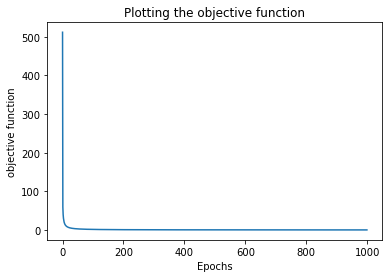

In [58]:
d = 6 # This are the dimensions of     each data point
N = 100 # This are the number of data points    to be generated
noise = 0.01
eta = 0.01     #setting  the learning    rate
T = 1000       #setting    the number of    epochs
mean = 0
sd = 0.7
par0 = np.random.normal(mean,sd,d+1) #generating     a random    initialisation
par, obj = train(par0, eta, T, ndf) #train    the    model

plt.plot(obj) # plotting the objective
plt.title("Plotting the objective function")
plt.xlabel("Epochs")
plt.ylabel("objective function")
plt.show()

In [59]:
epochs = [100,200,300]
etas = [0.1,0.01,0.001]
newpar = []
newobj = []
for epoch in epochs:
    for eta in etas:
        #d = 3 # The dimensions of each data point is.
        #N = 100 #The  number of data points to be generated is like.
        #noise = 0.01
        #eta = 0.01     #This is to set the learning rate
        #T = 1000       # This is to set the number of epochs
        mean = 0
        sd = 0.7
        par0 = np.random.normal(mean,sd,d+1) #That generating a random initialisation
        par, obj = train(par0, eta, T, ndf) #trainng  the model
        newpar.append(par)
        newobj.append(obj)

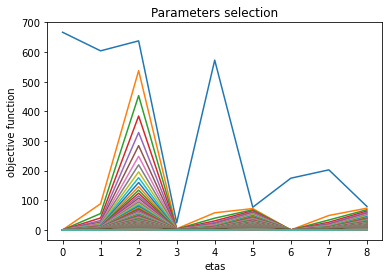

In [60]:
plt.plot(newobj) # plotting   the   new objective
plt.title("Parameters selection")
plt.xlabel("etas")
plt.ylabel("objective function")
plt.show()

In [61]:
def ER(par , data ):
    ER = 0
    y_hat = 1*(model(x,par) > 0.5)
    ER = (1/D)*(np.sum(y-y_hat)**2)
     # compute the error rate #see formula (5) in this pdf file#
    return ER

In [62]:
file

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,high
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


In [63]:
nf3 = file[['weight','acceleration','year','origin','high']]

In [64]:
nf3

,weight,acceleration,year,origin,high
0,3504,12.0,70,1,0
1,3693,11.5,70,1,0
2,3436,11.0,70,1,0
3,3433,12.0,70,1,0
4,3449,10.5,70,1,0
...,...,...,...,...,...
392,2790,15.6,82,1,1
393,2130,24.6,82,2,1
394,2295,11.6,82,1,1
395,2625,18.6,82,1,1


In [65]:
nf3 = pd.get_dummies( nf3, columns = ['origin'])

In [73]:
#df_t = df.copy()
#first part of normalisation
#(givenvalue-minimum_value)/(max_value_given_value-min_value_given_value)
nf3['weight']=(nf3['weight']-nf3['weight'].min())/(nf3['weight'].max()-nf3['weight'].min())
nf3['acceleration']=(nf3['acceleration']-nf3['acceleration'].min())/(nf3['acceleration'].max()-nf3['acceleration'].min())
nf3['year']=(nf3['year']-nf3['year'].min())/(nf3['year'].max()-nf3['year'].min())
print(nf3)

       weight  acceleration  year  high  origin_1  origin_2  origin_3
0    0.536150      0.238095   0.0     0         1         0         0
1    0.589736      0.208333   0.0     0         1         0         0
2    0.516870      0.178571   0.0     0         1         0         0
3    0.516019      0.238095   0.0     0         1         0         0
4    0.520556      0.148810   0.0     0         1         0         0
..        ...           ...   ...   ...       ...       ...       ...
392  0.333711      0.452381   1.0     1         1         0         0
393  0.146583      0.988095   1.0     1         0         1         0
394  0.193365      0.214286   1.0     1         1         0         0
395  0.286929      0.630952   1.0     1         1         0         0
396  0.313864      0.678571   1.0     1         1         0         0

[397 rows x 7 columns]


In [74]:
#This is to train the dataset with respect to the model
def train(par0, eta, T, data):
    par = np.array(list(par0))
    obj = []
    for t in range(T):
        l = objective(par, data)
        Dl = gradient(par, data)        
        obj.append(l)
        par[1:] = par[1:] - (eta * Dl)
    return par, obj

#Objective function is passed in the train model in order to obtain the l value
def objective(par, data):
    ell = 0
    for (x, y) in data:
        f = model(x, par)   
        ell = abs(ell - np.log((y * f) + (1 - y) * (1 - f)))
    return ell

#The gradient function is used to obtain the gradient decent
def gradient(par, data):
    Dl = np.zeros(len(par[1:]))
    for (x, y) in data:
        f = model(x, par)
        Df = dModel(x, par)
        #g = -1 * (((2*y-1)/(y*f)+((1 - y) * (1 - f))) * Df)
        g = -1 * ((2*y - 1)/((y * f) + (1 - y) * (1 - f))) * Df 
        Dl = Dl + g
    return Dl

def model(x, par):
    #for i in range(1,len(par)):     
    f = np.sum(par[1:] * x)
    #The first block of code in order to pass to all the functions
    f = par[0] + f
    f = 1/(1 + np.exp(-f))
    return f

def dModel(x, par):
    df = np.zeros(len(par))     
    df = np.sum(par[1:] * x)
    #The differenciation of the model(x,par)
    df = par[0] + df
    df = (1/(1 + np.exp(-df))) * (1 - (1/(1 + np.exp(-df))))
    df = df * x.T
    return df

def ER(par , data ):
    ER = 0
    ER = 1/ data
    y_hat = f > 0.5
    ER = np.sum(y-y_hat)
     # compute the error rate #see formula (5) in this pdf file#
    return ER

In [75]:
#nDf = [[ np. array ([x[0] , x[1] , x [2], x[4], x[5], x[6]], x[3])]for x in nf3.values]
nf3['high']= pd.to_numeric(nf3['high'])
nf3.info()
ndf = [[ np. array ([x[0] , x[1] , x [2], x[4] , x[5], x[6]]) , 1 * (x[3]>=23)]for x in nf3.values]
#print(D)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        397 non-null    float64
 1   acceleration  397 non-null    float64
 2   year          397 non-null    float64
 3   high          397 non-null    int64  
 4   origin_1      397 non-null    uint8  
 5   origin_2      397 non-null    uint8  
 6   origin_3      397 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 13.7 KB


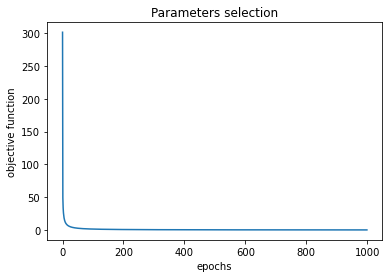

In [81]:
d = 6 # The dimensions of each    data point
N = 100 # The number of data points   to be generated
noise = 0.01
eta = 0.01     #This is the  set the    learning rate
T = 1000       #This is  set the number of    epochs
mean = 0
sd = 0.7
par0 = np.random.normal(mean,sd,d+1) #generating   a random initialisation
par, obj = train(par0, eta, T, ndf) # The   training the model

plt.plot(obj) # plot the    objective
plt.title("Parameters selection")
plt.xlabel("epochs")
plt.ylabel("objective function")
plt.show()

In [77]:
epochs = [100,200,300]
etas = [0.1,0.01,0.001]
newpar = []
newobj = []
for epoch in epochs:
    for eta in etas:
        #d = 3 # The      dimensions of each data point
        #N = 100 #The           number of data points to be generated
        #noise = 0.01
        #eta = 0.01     #setting    the learning rate
        #T = 1000       #setting     the number of epochs
        mean = 0
        sd = 0.7
        par0 = np.random.normal(mean,sd,d+1) #generating    a random initialisation
        par, obj = train(par0, eta, T, ndf) #training  the model
        newpar.append(par)
        newobj.append(obj)

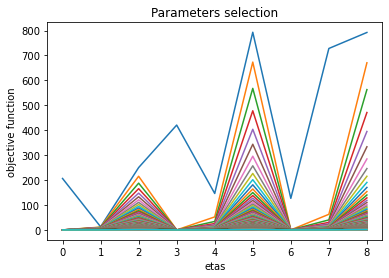

In [79]:
plt.plot(newobj)
plt.title("Parameters selection")
plt.xlabel("etas")
plt.ylabel("objective function")
# plotting      the objective
plt.show()

### Q4

In [82]:
def ER(par , data ):
    ER = 0
    ER = 1/ data
    y_hat = f > 0.5
    ER = np.sum(y-y_hat)
     # computing the error rate #seeing       formula (5) in this pdf file#
    return ER

